# NLP basics tutorial extended

In [1]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"

In [3]:
nlp = es_core_news_md.load()

In [4]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["news"]
collection = db["elespectador"]

In [5]:
text = []
for news in list(collection.find({}, {"title": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["full_text"])

In [6]:
text = " ".join(text)

In [7]:
# Sentence tokenization
sent_tokenize(text)[:10]

['Registrador confirma diferencia de un millón de votos entre preconteo y escrutinio Desde que estalló la controversia por las diferencias de votos entre el preconteo y el escrutinio, han sido pocas las ocasiones en las que el registrador Alexander Vega ha comparecido ante la prensa.',
 'La Registraduría se ha caracterizado por guardar silencio mientras que los señalamientos en su contra se acumulan.',
 'Después de varios días, el registrador salió a medios para manifestarse por los señalamientos, lo hizo en una entrevista con Noticias RCN.',
 'En el diálogo televisado, Vega reconoció que en “más de un millón de votos puede variar el preconteo y el escrutinio”.',
 'El dato lo dio al ser criticado por la aparición de más de 300.000 votos a favor del Pacto Histórico.',
 'Sin embargo, hizo la salvedad de que todas las papeletas no son por la coalición de izquierda: “Hay que ver cómo se distribuyen”.',
 'La cabeza de la Registraduría aceptó que nunca antes se había visto una diferencia de 

In [8]:
# Word tokenization
tokens = word_tokenize(text)
#Eliminamos los signos de puntuacion
words = [word for word in tokens if word.isalpha()]

In [9]:
words[:10]

['Registrador',
 'confirma',
 'diferencia',
 'de',
 'un',
 'millón',
 'de',
 'votos',
 'entre',
 'preconteo']

In [10]:
# Words distribution
frec_dist = FreqDist(words)

In [11]:
# Printing the most common words
frec_dist.most_common(10)

[('de', 1683),
 ('la', 1065),
 ('que', 812),
 ('en', 727),
 ('el', 662),
 ('a', 629),
 ('y', 598),
 ('las', 462),
 ('los', 438),
 ('del', 355)]

In [12]:
# Stop words
# Stop words are basically a set of commonly used words in any language, not just English.
# The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

stop_words = set(stopwords.words("spanish"))

In [13]:
# Removing stop words
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)

In [14]:
# Words distribution for text without stopwords
frec_dist_filtered = FreqDist(filtered_words)

In [15]:
# Printing the most common words
frec_dist_filtered.most_common(10)

[('hrs', 92),
 ('personas', 70),
 ('calle', 54),
 ('CL', 52),
 ('Cr', 50),
 ('carrera', 46),
 ('parte', 40),
 ('años', 37),
 ('Bogotá', 37),
 ('país', 35)]

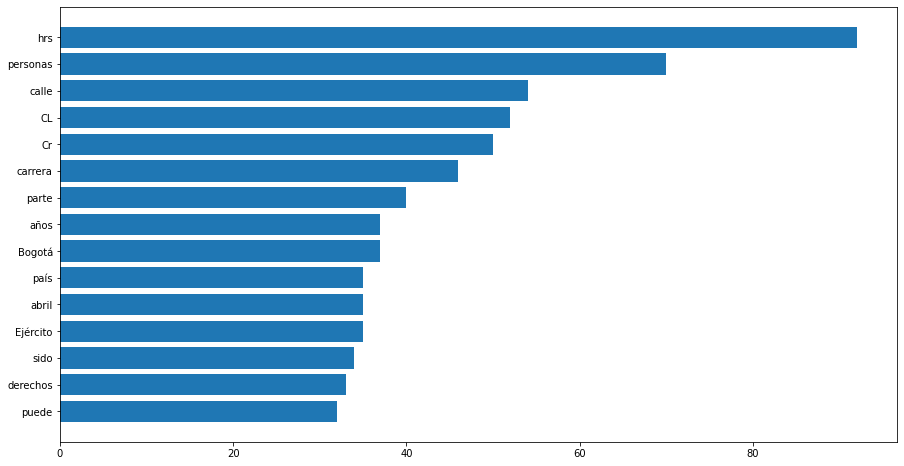

In [16]:
# Plotting a bar char for frecuencies
n = 15

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist_filtered.most_common(n) ], [ w[1] for w in frec_dist_filtered.most_common(n) ])
plt.gca().invert_yaxis()

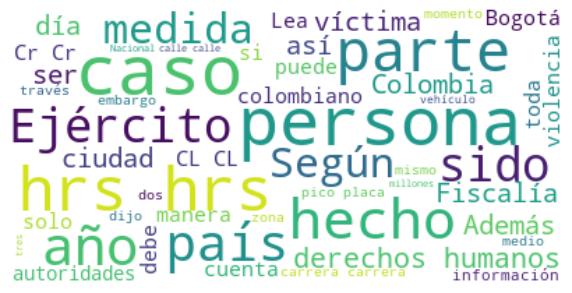

In [17]:
# Creating the wordcloud
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 50, background_color = "white").generate(" ".join(filtered_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [18]:
# Part of Speech (PoS)
# The meaning of each tag can be found here: https://www.guru99.com/pos-tagging-chunking-nltk.html
pos_tags = nltk.pos_tag(filtered_words)

In [19]:
# Sorting tags
pos_tags.sort(key = lambda tup: tup[1])
pos_tags [:10]

[('noviembre', 'CC'),
 ('norte', 'CC'),
 ('noviembre', 'CC'),
 ('nunca', 'CC'),
 ('zona', 'CD'),
 ('zona', 'CD'),
 ('votos', 'FW'),
 ('encargados', 'FW'),
 ('mesa', 'FW'),
 ('votación', 'FW')]

In [20]:
# Named Entity Recognition (NER)
document = nlp(text)
displacy.render(document, style = "ent")